In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('files/baseball.csv')
df

,Points,Assists,Rebounds
0,18.0,3.0,15
1,19.0,4.0,14
2,14.0,5.0,10
3,14.0,4.0,8
4,11.0,7.0,14
5,20.0,8.0,13
6,28.0,7.0,9
7,30.0,6.0,5
8,31.0,9.0,4
9,35.0,12.0,11


In [14]:
def euclidean(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

def manhattan(a, b):
    return np.sum(np.abs(a - b))

def minkowski(a, b, p=3):
    return np.sum(np.abs(a - b) ** p) ** (1/p)

In [15]:
def kmeans(data, k, distance_metric='euclidean', max_iters=100):
    # Get column names
    col1, col2 = data.columns[:2]
    
    # Step 3a: Initialize random centroids
    centroids = data.sample(n=k)[[col1, col2]].to_numpy()  # Select only the first two columns
    
    for i in range(max_iters):
        # Step 3b: Assign each point to the nearest centroid
        distances = np.zeros((data.shape[0], k))
        
        for idx, centroid in enumerate(centroids):
            # Calculate distances based on the selected metric
            if distance_metric == 'euclidean':
                distances[:, idx] = data[[col1, col2]].apply(lambda row: euclidean(row.to_numpy(), centroid), axis=1)
            elif distance_metric == 'manhattan':
                distances[:, idx] = data[[col1, col2]].apply(lambda row: manhattan(row.to_numpy(), centroid), axis=1)
            elif distance_metric == 'minkowski':
                distances[:, idx] = data[[col1, col2]].apply(lambda row: minkowski(row.to_numpy(), centroid), axis=1)
        
        # Assign clusters based on closest centroid
        data['cluster'] = np.argmin(distances, axis=1)
        
        # Step 3c: Update centroids
        new_centroids = data.groupby('cluster')[[col1, col2]].mean().to_numpy()
        
        # Check for convergence
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids

    # Step 3d: Calculate SSE
    sse = sum(np.min(distances, axis=1) ** 2)

    return data, centroids, sse

In [16]:
def plot_clusters(data, centroids, k, distance_metric):
    col1, col2 = data.columns[:2]
    colors = ['red', 'blue', 'green', 'purple']
    plt.figure(figsize=(6, 4))
    for cluster in range(k):
        cluster_points = data[data['cluster'] == cluster]
        plt.scatter(cluster_points[col1], cluster_points[col2], color=colors[cluster % len(colors)], label=f'Cluster {cluster + 1}')
    plt.scatter([c[0] for c in centroids], [c[1] for c in centroids], color='black', marker='X', s=100, label='Centroids')
    plt.title(f'K-means Clustering with k={k} ({distance_metric.capitalize()} Distance)')
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.legend()
    plt.show()

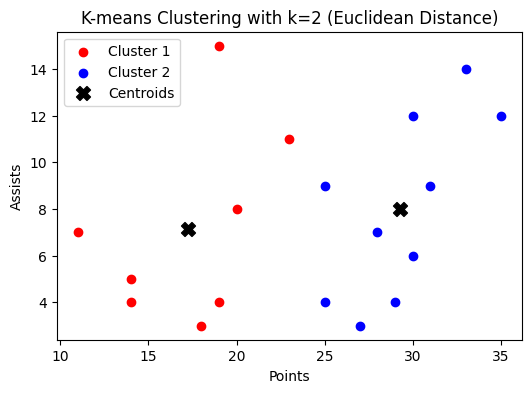

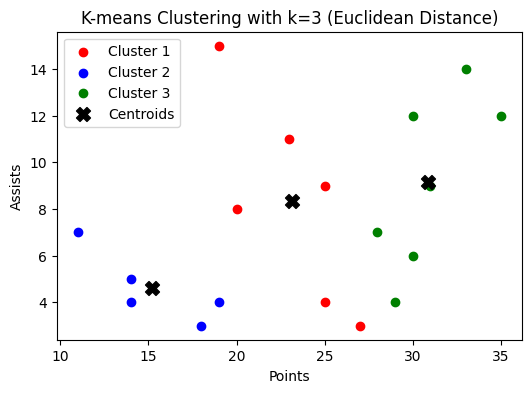

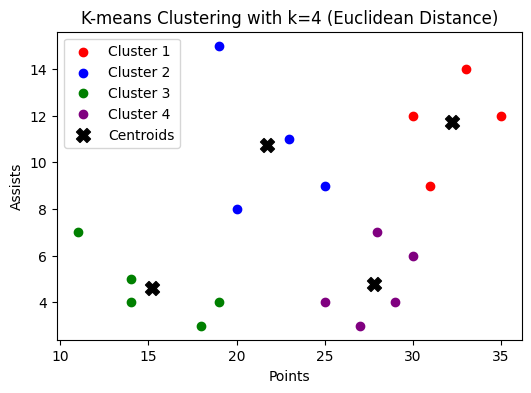

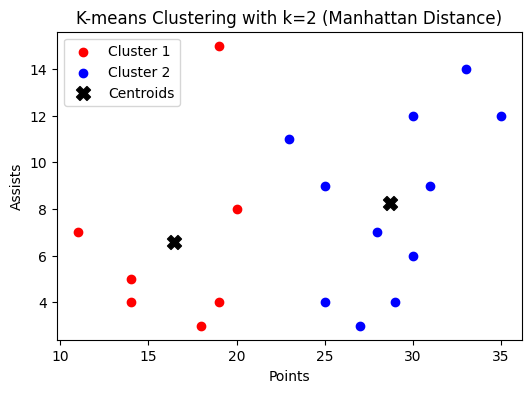

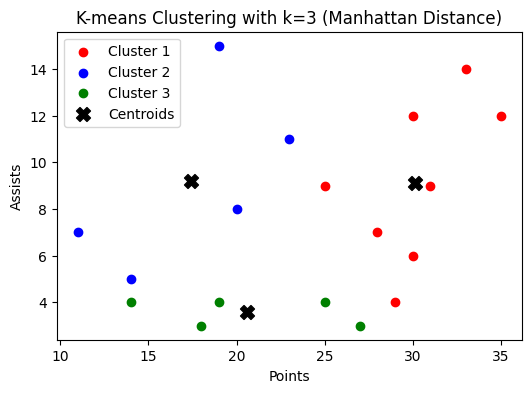

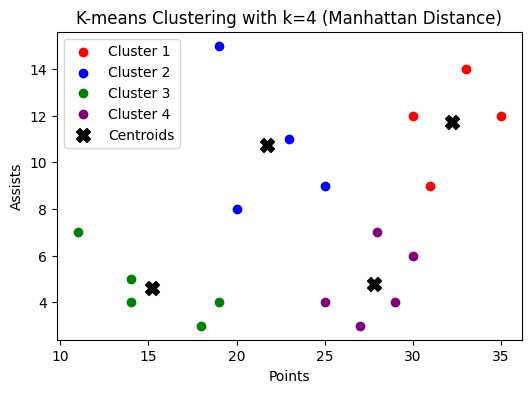

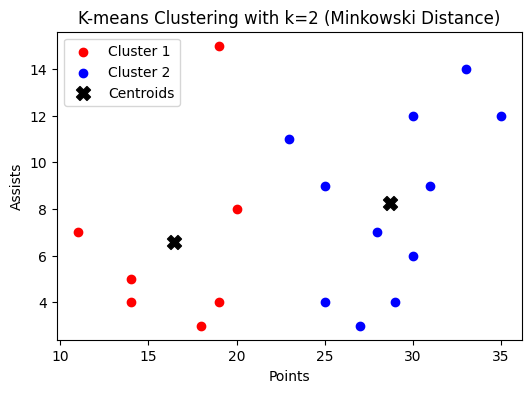

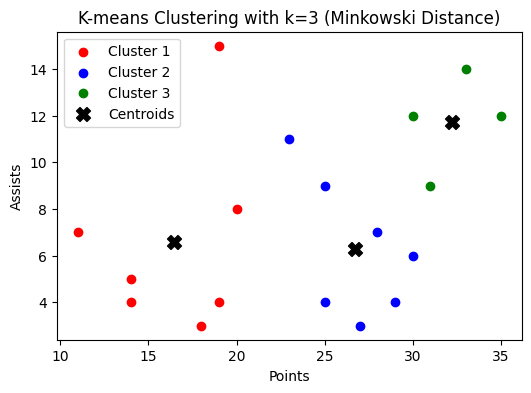

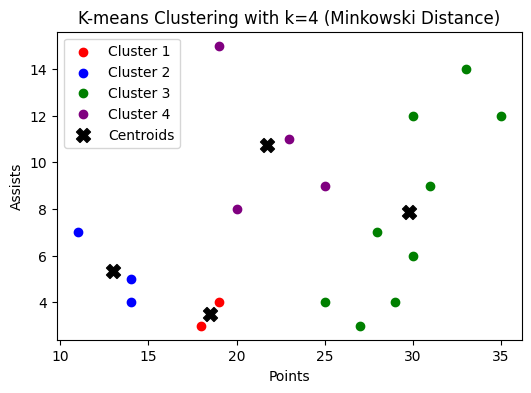

In [17]:
k_values = [2, 3, 4]
distance_metrics = ['euclidean', 'manhattan', 'minkowski']
sse_values = {}

for distance_metric in distance_metrics:
    for k in k_values:
        clustered_data, centroids, sse = kmeans(df.copy(), k, distance_metric=distance_metric)
        sse_values[(k, distance_metric)] = sse
        plot_clusters(clustered_data, centroids, k, distance_metric)

In [18]:
sse_values

{(2, 'euclidean'): 452.47499999999997,
 (3, 'euclidean'): 315.8809523809524,
 (4, 'euclidean'): 156.6,
 (2, 'manhattan'): 749.7578006409176,
 (3, 'manhattan'): 616.3349999999999,
 (4, 'manhattan'): 265.87,
 (2, 'minkowski'): 390.5285034672867,
 (3, 'minkowski'): 257.70101872222597,
 (4, 'minkowski'): 227.5951703497584}

In [24]:
k_values = [2, 3, 4,5,6,7,8,9,10]
distance_metrics = ['euclidean', 'manhattan', 'minkowski']
sse_values = {}

for distance_metric in distance_metrics:
    for k in k_values:
        clustered_data, centroids, sse = kmeans(df.copy(), k, distance_metric=distance_metric)
        sse_values[(k, distance_metric)] = sse


In [25]:
sse_values

{(2, 'euclidean'): 441.79220779220776,
 (3, 'euclidean'): 307.9444444444444,
 (4, 'euclidean'): 269.2857142857142,
 (5, 'euclidean'): 117.1,
 (6, 'euclidean'): 110.91666666666666,
 (7, 'euclidean'): 105.10000000000001,
 (8, 'euclidean'): 87.16666666666667,
 (9, 'euclidean'): 113.58333333333334,
 (10, 'euclidean'): 42.833333333333336,
 (2, 'manhattan'): 749.7578006409176,
 (3, 'manhattan'): 538.5355555555556,
 (4, 'manhattan'): 265.87,
 (5, 'manhattan'): 204.05555555555557,
 (6, 'manhattan'): 194.20666666666665,
 (7, 'manhattan'): 193.80222222222224,
 (8, 'manhattan'): 119.25,
 (9, 'manhattan'): 101.95666666666666,
 (10, 'manhattan'): 64.83333333333334,
 (2, 'minkowski'): 390.5285034672867,
 (3, 'minkowski'): 272.26336033006044,
 (4, 'minkowski'): 138.421627088345,
 (5, 'minkowski'): 111.15099945268427,
 (6, 'minkowski'): 89.05097141129752,
 (7, 'minkowski'): 97.96558086329333,
 (8, 'minkowski'): 60.6779814420396,
 (9, 'minkowski'): 50.35123673580197,
 (10, 'minkowski'): 58.982901334406

Optimal k for Euclidean Distance: 7
Optimal k for Manhattan Distance: 8
Optimal k for Minkowski Distance: 2


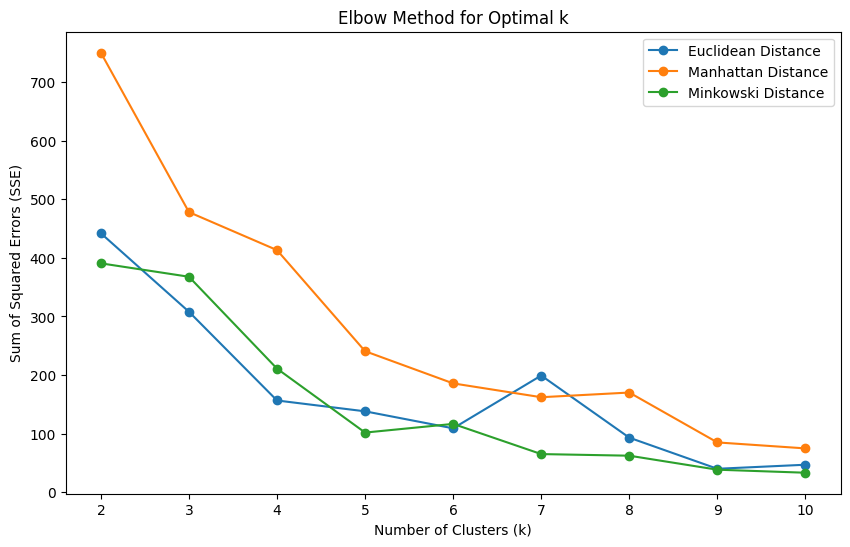

In [27]:

distance_metrics = ['euclidean', 'manhattan', 'minkowski']
for distance_metric in distance_metrics:
    sse_values[distance_metric] = []
    for k in k_values:
        clustered_data, centroids, sse = kmeans(df.copy(), k, distance_metric=distance_metric)
        sse_values[distance_metric].append(sse)

# Plot the SSE values for each distance metric
plt.figure(figsize=(10, 6))
for distance_metric in distance_metrics:
    plt.plot(k_values, sse_values[distance_metric], label=f'{distance_metric.capitalize()} Distance', marker='o')

for distance_metric in distance_metrics:
    sse = np.array(sse_values[distance_metric])
    grad1 = np.gradient(sse)  # First derivative (rate of change)
    grad2 = np.gradient(grad1)  # Second derivative (rate of change of the rate of change)
    
    # Find the k where the second derivative is the most negative (elbow point)
    optimal_k = np.argmin(grad2) + 2  # Add 2 because we use np.gradient, which reduces the length by 1
    
    print(f"Optimal k for {distance_metric.capitalize()} Distance: {optimal_k}")

plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.legend()
plt.show()